# PyTorch 

## Basics

### Tensors

In [1]:
from __future__ import print_function
import torch

In [2]:
x = torch.empty(5, 3)
print(x)
x = torch.rand(5, 3)
print(x)
x = torch.zeros(5, 3, dtype=torch.long)
print(x)
x = torch.tensor([5.5, 3])
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.7345, 0.6624, 0.4412],
        [0.2884, 0.3029, 0.0506],
        [0.7695, 0.7000, 0.3889],
        [0.6437, 0.7411, 0.0642],
        [0.2545, 0.4964, 0.5866]])
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
tensor([5.5000, 3.0000])


In [3]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-1.3649,  0.9330, -1.3682],
        [-0.8331,  1.1962,  0.0519],
        [-0.0483,  1.2556,  0.4639],
        [ 1.4504,  1.6032, -0.7822],
        [-0.7719, -0.2992,  0.8236]])


In [4]:
y = torch.rand(5, 3)
print(x + y)

tensor([[-1.1652,  1.2635, -0.6709],
        [-0.6474,  1.4688,  0.2519],
        [ 0.2411,  1.7510,  1.1425],
        [ 1.8559,  2.1221, -0.2047],
        [-0.3417,  0.2678,  0.9697]])


In [5]:
torch.add(x,y)

tensor([[-1.1652,  1.2635, -0.6709],
        [-0.6474,  1.4688,  0.2519],
        [ 0.2411,  1.7510,  1.1425],
        [ 1.8559,  2.1221, -0.2047],
        [-0.3417,  0.2678,  0.9697]])

In [6]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)#传入了result的引用
print(result)

tensor([[-1.1652,  1.2635, -0.6709],
        [-0.6474,  1.4688,  0.2519],
        [ 0.2411,  1.7510,  1.1425],
        [ 1.8559,  2.1221, -0.2047],
        [-0.3417,  0.2678,  0.9697]])


In [7]:
# adds x to y
#调用方法永久地改变了y的值
y.add_(x)
print(y)

tensor([[-1.1652,  1.2635, -0.6709],
        [-0.6474,  1.4688,  0.2519],
        [ 0.2411,  1.7510,  1.1425],
        [ 1.8559,  2.1221, -0.2047],
        [-0.3417,  0.2678,  0.9697]])


Any operation that mutates a tensor in-place is post-fixed with an _. For example: x.copy_(y), x.t_(), will change x.

In [8]:
print(x)
print(x[:,0])

tensor([[-1.3649,  0.9330, -1.3682],
        [-0.8331,  1.1962,  0.0519],
        [-0.0483,  1.2556,  0.4639],
        [ 1.4504,  1.6032, -0.7822],
        [-0.7719, -0.2992,  0.8236]])
tensor([-1.3649, -0.8331, -0.0483,  1.4504, -0.7719])


In [9]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [10]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.0946])
-0.09458976238965988


### Work with Numpy

In [11]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [12]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [13]:
#Covert Back
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


### CUDA

In [21]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([[1., 1.],
        [1., 1.]], device='cuda:0', grad_fn=<AddBackward0>)
tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64, grad_fn=<CopyBackwards>)


## AUTOGRAD

In [22]:
import torch

### require_grad and grad_fn

In [23]:
x = torch.zeros(2, 2, requires_grad=True)
print(x)

tensor([[0., 0.],
        [0., 0.]], requires_grad=True)


In [24]:
y=x+2
print(y)
print(y.grad_fn)

tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)


In [25]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[12., 12.],
        [12., 12.]], grad_fn=<MulBackward0>) tensor(12., grad_fn=<MeanBackward0>)


In [26]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.grad_fn)
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

None
False
True


### Back Propagation

In [27]:
out.backward()

In [28]:
print(x.grad)

tensor([[3., 3.],
        [3., 3.]])


In [29]:
x = torch.zeros(3, requires_grad=True)

y = ((-x) * 2)**2

#此处仍然是在x的初始位置进行求导。

print(y)

v = torch.tensor([0.1,1,10], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([0., 0., 0.], grad_fn=<PowBackward0>)
tensor([0., 0., 0.])


In [30]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


## Neural Network

### Feed-Forward Network

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [33]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 3, 3])


In [34]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0186,  0.0665, -0.0333,  0.0139,  0.0821, -0.0818,  0.0365, -0.0526,
         -0.0179,  0.0707]], grad_fn=<AddmmBackward>)


In [35]:
net.zero_grad()
out.backward(torch.randn(1, 10))

### Loss Function

In [45]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.2096, grad_fn=<MseLossBackward>)


In [49]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

### Back Propagation

In [50]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0005, -0.0215, -0.0098, -0.0119,  0.0045, -0.0215])


### Updating the weights

In [52]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [53]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

## TRAINING A CLASSIFIER

### Training an image classifier

In [88]:
import torch
import torchvision
import torchvision.transforms as transforms

In [89]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


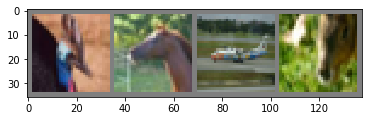

 bird horse plane  deer


In [90]:
#To see some of the images
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Define a Convolutional Neural Network

In [199]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### Define a Loss function and optimizer

In [183]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Train the network

In [177]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 0.230
[1,   400] loss: 0.229
[1,   600] loss: 0.226
[1,   800] loss: 0.215
[1,  1000] loss: 0.210
[1,  1200] loss: 0.208
[1,  1400] loss: 0.199
[1,  1600] loss: 0.199
[1,  1800] loss: 0.193
[1,  2000] loss: 0.191
[1,  2200] loss: 0.179
[1,  2400] loss: 0.184
[1,  2600] loss: 0.177


KeyboardInterrupt: 

In [189]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### Test the network on the test data

In [190]:
dataiter = iter(testloader)

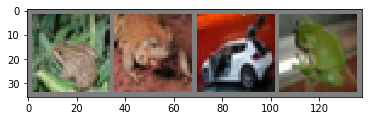

GroundTruth:   frog  frog   car  frog


In [194]:
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [192]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [196]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:   deer  deer  deer  deer


In [197]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %


In [198]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane :  0 %
Accuracy of   car :  0 %
Accuracy of  bird :  1 %
Accuracy of   cat :  0 %
Accuracy of  deer : 99 %
Accuracy of   dog :  0 %
Accuracy of  frog :  0 %
Accuracy of horse :  0 %
Accuracy of  ship :  0 %
Accuracy of truck :  0 %


### Training on GPU

In [184]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [185]:
net.to(device)

Net(
  (conv1): Conv2d(3, 20, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(20, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [186]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 0.230
[1,   400] loss: 0.230
[1,   600] loss: 0.230
[1,   800] loss: 0.230
[1,  1000] loss: 0.229
[1,  1200] loss: 0.228
[1,  1400] loss: 0.224
[1,  1600] loss: 0.219
[1,  1800] loss: 0.206
[1,  2000] loss: 0.205
[1,  2200] loss: 0.201
[1,  2400] loss: 0.198
[1,  2600] loss: 0.194
[1,  2800] loss: 0.189
[1,  3000] loss: 0.184
[1,  3200] loss: 0.184
[1,  3400] loss: 0.176
[1,  3600] loss: 0.178
[1,  3800] loss: 0.173
[1,  4000] loss: 0.177
[1,  4200] loss: 0.170
[1,  4400] loss: 0.169
[1,  4600] loss: 0.162
[1,  4800] loss: 0.163
[1,  5000] loss: 0.167
[1,  5200] loss: 0.156
[1,  5400] loss: 0.164
[1,  5600] loss: 0.154
[1,  5800] loss: 0.160
[1,  6000] loss: 0.164
[1,  6200] loss: 0.162
[1,  6400] loss: 0.157
[1,  6600] loss: 0.156
[1,  6800] loss: 0.154
[1,  7000] loss: 0.154
[1,  7200] loss: 0.152
[1,  7400] loss: 0.154
[1,  7600] loss: 0.146
[1,  7800] loss: 0.149
[1,  8000] loss: 0.153
[1,  8200] loss: 0.141
[1,  8400] loss: 0.153
[1,  8600] loss: 0.149
[1,  8800] 